In [1]:
import os
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from math import sqrt
from scipy import stats

In [2]:
os.chdir('C:\\Users\\LENOVO\\Desktop\\VIT hack-a-thon\\chennai rainfall')

In [3]:
df = pd.read_csv('chennai from 1950.csv')

In [4]:
df.columns

Index(['Year', 'Population', 'GrowthRate', 'Growth', 'Location'], dtype='object')

In [5]:
data = df[['Year', 'GrowthRate', 'Growth', 'Population']]
data.shape

(71, 4)

In [6]:
data.head()

,Year,GrowthRate,Growth,Population
0,1951,0.0423,63031,1554324
1,1952,0.0235,36487,1590811
2,1953,0.0234,37239,1628050
3,1954,0.0234,38164,1666214
4,1955,0.0234,39058,1705272


In [7]:
import seaborn as sns

<AxesSubplot:>

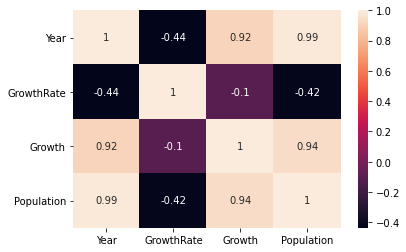

In [8]:
sns.heatmap(data.corr(), annot=True)

In [9]:
X = data.loc[:,:'Growth']
X.shape

(71, 3)

In [10]:
X.describe()

,Year,GrowthRate,Growth
count,71.000000,71.000000,71.000000
mean,1986.000000,0.028882,137235.563380
std,20.639767,0.008831,63824.023467
min,1951.000000,0.021200,36487.000000
25%,1968.500000,0.023500,106496.000000
50%,1986.000000,0.026100,122273.000000
75%,2003.500000,0.031000,183307.000000
max,2021.000000,0.049300,266233.000000


In [11]:
for col in X.columns:
    X[col].fillna(X[col].median(), inplace=True)

In [12]:
X.isna().sum()

Year          0
GrowthRate    0
Growth        0
dtype: int64

In [13]:
y = data['Population']
y.shape

(71,)

In [14]:
y.isna().sum()

0

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [16]:
X_log_train = np.log(X_train)
X_log_test = np.log(X_test)
y_log_train = np.log(y_train)
y_log_test = np.log(y_test)

In [17]:

lm_log = linear_model.LinearRegression()
model = lm_log.fit(X_log_train, y_log_train)

In [18]:
lm_log.coef_

array([-0.10019514, -0.96864107,  1.00150174])

In [19]:
lm_log.intercept_

0.8837845496837886

In [20]:
y_log_fit = lm_log.predict(X_log_train)

In [21]:
y_fit = np.exp(y_log_fit)

In [22]:
r2_train = r2_score(y_train, y_fit)
r2_train

0.9999900074566777

In [23]:
rmse_train = sqrt(mean_squared_error(y_train, y_fit))
rmse_train

8901.696148123636

In [24]:
mae_train = mean_absolute_error(y_train, y_fit)
mae_train

7004.9294603288945

In [25]:
y_log_pred = lm_log.predict(X_log_test)

In [26]:
y_pred = np.exp(y_log_pred)

In [27]:
rmse_test = sqrt(mean_squared_error(y_test, y_pred))
rmse_test

9723.828996604501

In [28]:
mae_test = mean_absolute_error(y_test, y_pred)
mae_test

7369.263548198738

In [29]:
r2_test = r2_score(y_test, y_pred)
r2_test

0.9999867070330057

In [30]:
y_log_pred_all = lm_log.predict(np.log(X))

In [31]:
y_pred_all = np.exp(y_log_pred_all)

In [32]:
y[:10]

0    1554324
1    1590811
2    1628050
3    1666214
4    1705272
5    1745302
6    1786158
7    1828028
8    1870880
9    1914797
Name: Population, dtype: int64

In [33]:
y_pred_all[:10]

array([1554175.3122064 , 1588446.39289266, 1627861.16669101,
       1668272.41007576, 1707323.89862102, 1742574.52344562,
       1785856.76412253, 1830153.42472371, 1873046.39908674,
       1911657.04341519])

In [34]:
stats.describe(y_pred_all)

DescribeResult(nobs=71, minmax=(1554175.312206405, 11206327.432949862), mean=5242362.993808384, variance=7813907667308.578, skewness=0.4653930366129662, kurtosis=-0.8573342401391923)

In [35]:
df['Population_pred'] = y_pred_all[:]
df[:10]

,Year,Population,GrowthRate,Growth,Location,Population_pred
0,1951,1554324,0.0423,63031,Chennai,1.554175e+06
1,1952,1590811,0.0235,36487,Chennai,1.588446e+06
2,1953,1628050,0.0234,37239,Chennai,1.627861e+06
3,1954,1666214,0.0234,38164,Chennai,1.668272e+06
4,1955,1705272,0.0234,39058,Chennai,1.707324e+06
5,1956,1745302,0.0235,40030,Chennai,1.742575e+06
6,1957,1786158,0.0234,40856,Chennai,1.785857e+06
7,1958,1828028,0.0234,41870,Chennai,1.830153e+06
8,1959,1870880,0.0234,42852,Chennai,1.873046e+06
9,1960,1914797,0.0235,43917,Chennai,1.911657e+06


In [36]:
df = df.round({'Population_pred':2})
df

,Year,Population,GrowthRate,Growth,Location,Population_pred
0,1951,1554324,0.0423,63031,Chennai,1554175.31
1,1952,1590811,0.0235,36487,Chennai,1588446.39
2,1953,1628050,0.0234,37239,Chennai,1627861.17
3,1954,1666214,0.0234,38164,Chennai,1668272.41
4,1955,1705272,0.0234,39058,Chennai,1707323.90
...,...,...,...,...,...,...
66,2017,10189373,0.0261,259454,Chennai,10200118.68
67,2018,10455606,0.0261,266233,Chennai,10466512.43
68,2019,10711243,0.0244,255637,Chennai,10726281.38
69,2020,10971108,0.0243,259865,Chennai,10946871.94


In [37]:
X['Growth'].mean()

137235.5633802817

In [38]:
# df.to_csv('linear_regression_pred_log-transform.csv', index=False)

In [39]:
mean_absolute_error(y, y_pred_all)

7117.821712908282

In [40]:
median_absolute_error(y,y_pred_all)

5219.334500368219

In [41]:
r2_score(y,y_pred_all)

0.9999890972746266

In [42]:
x = [[2022, 11678765, 0.0256]] #output prediction
lm_log.predict(np.log(x))

array([-19.31252223])

In [43]:
df

,Year,Population,GrowthRate,Growth,Location,Population_pred
0,1951,1554324,0.0423,63031,Chennai,1554175.31
1,1952,1590811,0.0235,36487,Chennai,1588446.39
2,1953,1628050,0.0234,37239,Chennai,1627861.17
3,1954,1666214,0.0234,38164,Chennai,1668272.41
4,1955,1705272,0.0234,39058,Chennai,1707323.90
...,...,...,...,...,...,...
66,2017,10189373,0.0261,259454,Chennai,10200118.68
67,2018,10455606,0.0261,266233,Chennai,10466512.43
68,2019,10711243,0.0244,255637,Chennai,10726281.38
69,2020,10971108,0.0243,259865,Chennai,10946871.94


In [44]:
graph = pd.DataFrame({'Index':df['Year'],'Actual Population':df['Population'], 'Predicted Population':df['Population_pred']})

In [45]:
graph = graph[:30]

<AxesSubplot:>

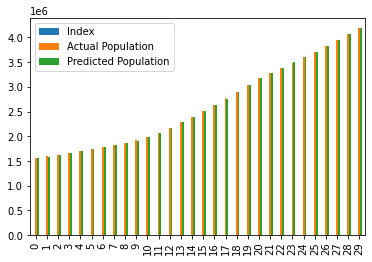

In [46]:
graph.plot(kind='bar')

In [47]:
graph

,Index,Actual Population,Predicted Population
0,1951,1554324,1554175.31
1,1952,1590811,1588446.39
2,1953,1628050,1627861.17
3,1954,1666214,1668272.41
4,1955,1705272,1707323.90
5,1956,1745302,1742574.52
6,1957,1786158,1785856.76
7,1958,1828028,1830153.42
8,1959,1870880,1873046.40
9,1960,1914797,1911657.04


In [48]:
import pickle

In [49]:
# filename = 'population_pred_model'
# pickle.dump(model, open(filename, 'wb'))

In [50]:
# loaded_model = pickle.load(open(filename, 'rb'))
# loaded_model.predict(X_train)

water need

In [51]:
df['MCFT'] = ""

In [52]:
for i in range(len(df)):
    df['MCFT'][i] = df['Population'] * 0.0000000352 * 135 * 365

<ipython-input-52-437b01054979>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MCFT'][i] = df['Population'] * 0.0000000352 * 135 * 365


In [53]:
df = df.round({'MCFT':2})

In [54]:
df.head(3)

,Year,Population,GrowthRate,Growth,Location,Population_pred,MCFT
0,1951,1554324,0.0423,63031,Chennai,1554175.31,0 2695.943892 1 2759.229863 2 2...
1,1952,1590811,0.0235,36487,Chennai,1588446.39,0 2695.943892 1 2759.229863 2 2...
2,1953,1628050,0.0234,37239,Chennai,1627861.17,0 2695.943892 1 2759.229863 2 2...


In [55]:
df.to_csv('water_requirement.csv', index=False)

In [64]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Autual Population'}>

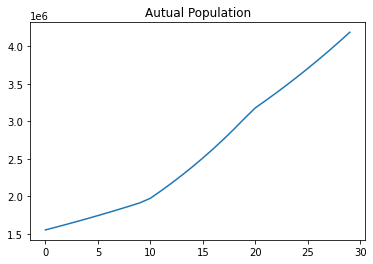

In [69]:
graph['Actual Population'].plot(kind='line', title='Autual Population')

<AxesSubplot:title={'center':'Predicted Growth Population'}>

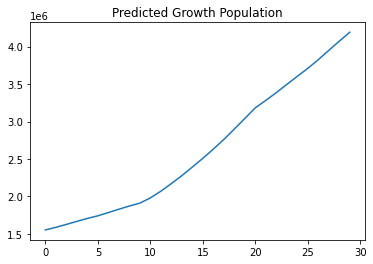

In [68]:
graph['Predicted Population'].plot(kind='line', title='Predicted Growth Population')